# Predicting Bank Users which are tending to buy a special credit card

### importing req packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### read training dataset

In [2]:
train_df = pd.read_csv("train_data.csv")
train_df.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [3]:
train_df.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [4]:
train_df.shape

(245725, 11)

### checking for null values

In [5]:
train_df.isna().sum()
#train_df.isna().sum()[train_df.isna().sum() != 0]

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [6]:
train_df.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

### Checking different values/counts in each column

In [7]:
train_df.Gender.value_counts()

Male      134197
Female    111528
Name: Gender, dtype: int64

In [8]:
train_df.Region_Code.unique().shape

(35,)

In [9]:
train_df.Occupation.value_counts()

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64

In [10]:
train_df.Channel_Code.value_counts()

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64

In [11]:
train_df.Vintage.unique()

array([ 43,  32,  26,  19,  33,  20,  13,  38,  49, 123,  14,  31,  57,
        69,  97,  15,  63,  21,  99,  56,  87,  62,  55, 103, 104,  93,
        61,  91,  27,  39,  50,  45,  25, 117,  80,  81,  73,  67, 109,
        92, 122,  75,  79, 121, 111, 116,  85, 115,  86,  37,  74, 110,
        44,   9,  68,  51,  98, 105, 127, 129, 133,   8,   7, 128, 135,
       134], dtype=int64)

In [12]:
train_df.Vintage.value_counts().nlargest(10)

13    12338
21    12277
14    12267
15    12242
19    12212
20    12032
26    10966
27    10919
25    10831
32     9589
Name: Vintage, dtype: int64

In [13]:
train_df.Credit_Product.value_counts(dropna=False)

No     144357
Yes     72043
NaN     29325
Name: Credit_Product, dtype: int64

In [14]:
train_df.Is_Active.value_counts()

No     150290
Yes     95435
Name: Is_Active, dtype: int64

In [15]:
train_df.Is_Lead.value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

### <font color='RED'>the above cell tells that the dataset is imbalanced</font>

In [16]:
train_df.head(2)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0


## Filling missing values in Credit Product

### Age vs Occupation vs Channel_code based on Credit Product

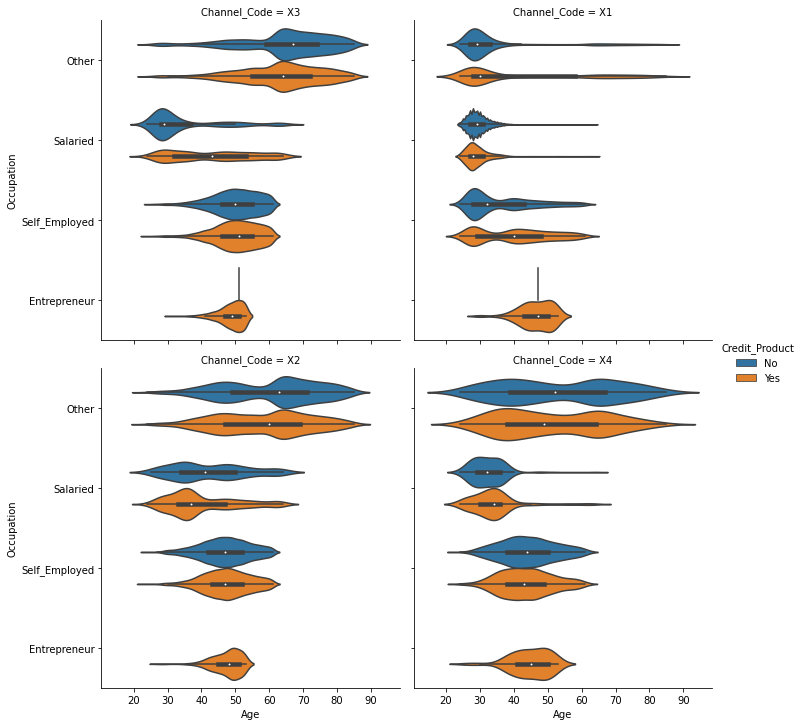

In [17]:
sns.catplot(data=train_df, x='Age', col='Channel_Code', col_wrap=2 , y='Occupation', hue='Credit_Product',
            kind='violin')

In [18]:
# sns.catplot(data=train_df, x='Vintage', col='Channel_Code', col_wrap=2 , y='Occupation', hue='Credit_Product',
#             kind='violin')

### credit_prodcut vs Avg acc bal

<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Count'>

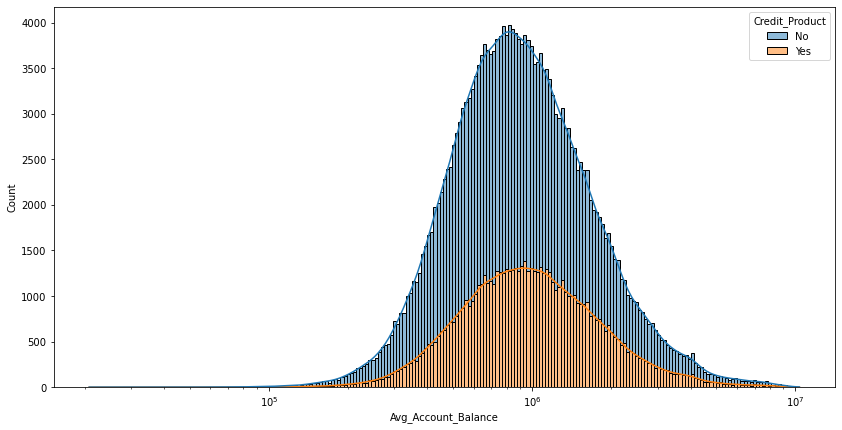

In [19]:
fig, ax = plt.subplots(figsize=(14,7))
sns.histplot(data=train_df, x='Avg_Account_Balance', hue='Credit_Product', 
             multiple='stack', kde=True, log_scale=True)

In [20]:
# fig, ax = plt.subplots(figsize=(14,7))
# sns.histplot(data=train_df, x='Avg_Account_Balance', hue='Gender', 
#              multiple='stack', kde=True, log_scale=True)

### Vintage vs credit_product

<AxesSubplot:xlabel='Vintage', ylabel='Count'>

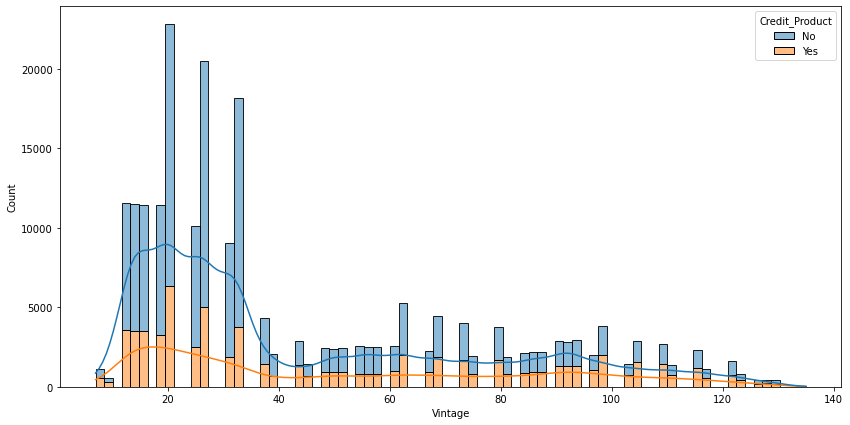

In [21]:
fig, ax = plt.subplots(figsize=(14,7))
sns.histplot(data=train_df, x='Vintage', hue='Credit_Product', multiple='stack', kde=True)

### channel code count based on credit_product

<AxesSubplot:xlabel='Channel_Code', ylabel='count'>

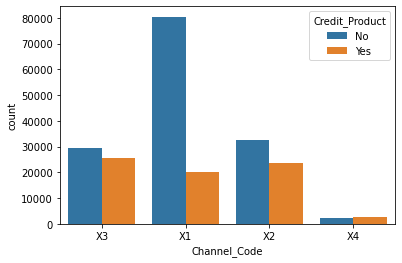

In [22]:
sns.countplot(x=train_df.Channel_Code, hue=train_df.Credit_Product)

In [23]:
# X1_df = train_df[train_df.Channel_Code == 'X1']
# print('mean', X1_df.Age.mean())
# print('median', X1_df.Age.median())
# print('mode', X1_df.Age.mode())

### occupation count based on credit_product

<AxesSubplot:xlabel='Occupation', ylabel='count'>

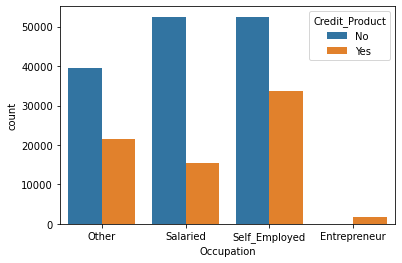

In [24]:
sns.countplot(x=train_df.Occupation, hue=train_df.Credit_Product)

### channel code count based on occupation

<AxesSubplot:xlabel='Channel_Code', ylabel='count'>

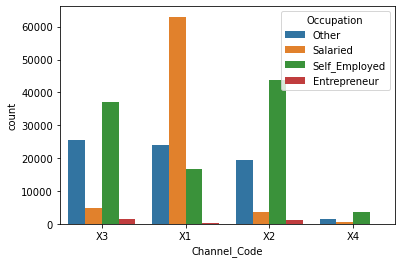

In [25]:
sns.countplot(x=train_df.Channel_Code, hue=train_df.Occupation)

### Age distribution based Occupation

### Vintage distribution based on occupation

<AxesSubplot:xlabel='Age', ylabel='Count'>

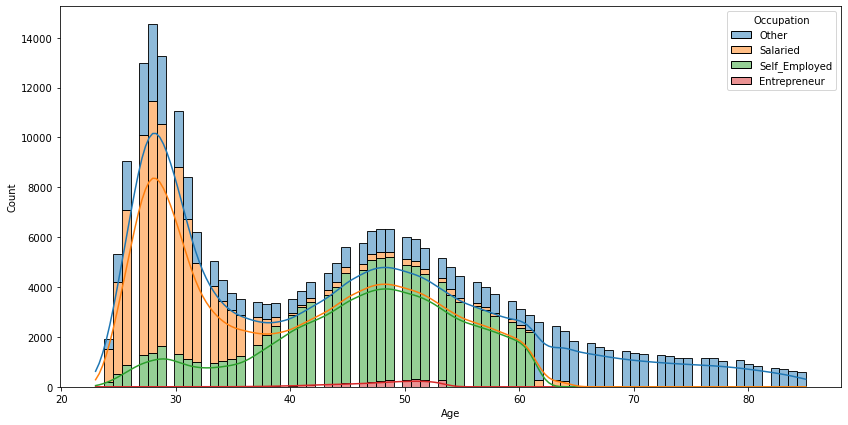

In [26]:
fig_dims = (14, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(x=train_df.Age ,hue=train_df.Occupation, multiple='stack', kde='True')

### Vintage distribution based on credit_product

<AxesSubplot:xlabel='Vintage', ylabel='Count'>

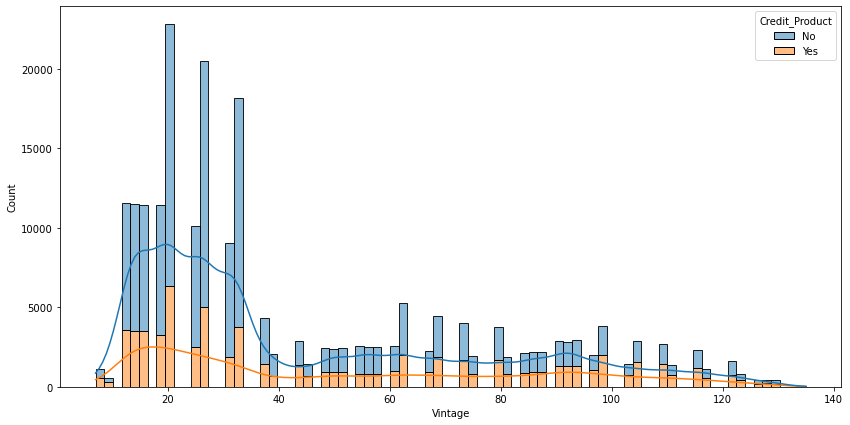

In [27]:
fig_dims = (14, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(x=train_df.Vintage ,hue=train_df.Credit_Product, multiple='stack', kde='True')

### Age distribution based on credit_product

<AxesSubplot:xlabel='Age', ylabel='Count'>

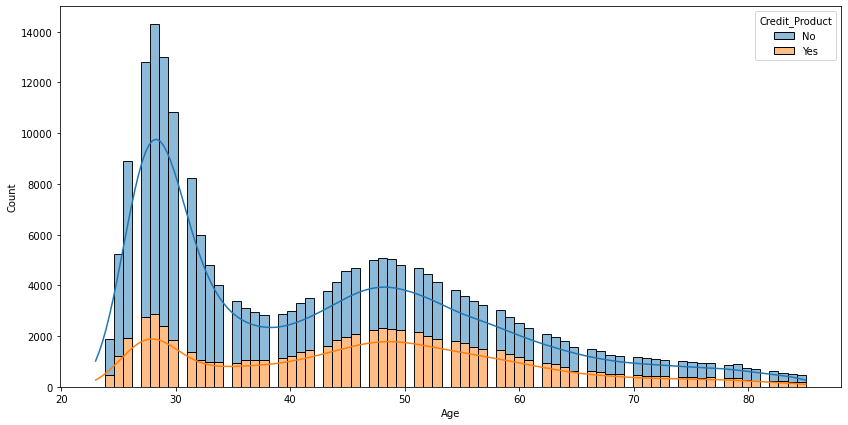

In [28]:
fig_dims = (14, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(x=train_df.Age ,hue=train_df.Credit_Product, multiple='stack', kde='True')

In [29]:
#sns.scatterplot(x=train_df.Age, y=train_df.Vintage, hue=train_df.Credit_Product)

### see null record count based on Occupation

In [30]:
temp = train_df[train_df.Credit_Product.isna()]
temp.Occupation.value_counts()

Self_Employed    14766
Other             9327
Salaried          4216
Entrepreneur      1016
Name: Occupation, dtype: int64

### null records based on channel code, occupation

In [31]:
temp.groupby('Channel_Code').Occupation.value_counts()

Channel_Code  Occupation   
X1            Salaried         1314
              Self_Employed     877
              Other             800
              Entrepreneur       67
X2            Self_Employed    6638
              Other            3461
              Salaried         1350
              Entrepreneur      385
X3            Self_Employed    6828
              Other            4901
              Salaried         1441
              Entrepreneur      547
X4            Self_Employed     423
              Other             165
              Salaried          111
              Entrepreneur       17
Name: Occupation, dtype: int64

In [32]:
#temp.Gender.value_counts()

### from age, occupation graph we see from age 60 onwards occupation is mostly others
checking counts of such persons

In [33]:
train_df[train_df.Age >=66].groupby(['Occupation']).Credit_Product.value_counts(dropna=False)

Occupation  Credit_Product
Other       No                11644
            Yes                7384
            NaN                3591
Name: Credit_Product, dtype: int64

#### the above cell tells us that person whose is 66 and above have occupation as 'Others'. 
- since count of credit Product 'No' is greater than we can fill credit product as No for this age group

#### from age and credit product graph we can see that age group less than around 35 have hugh NO as credit product
lets check count of it

In [34]:
train_df[train_df.Age <= 35].groupby(['Occupation']).Credit_Product.value_counts(dropna=False)

Occupation     Credit_Product
Entrepreneur   Yes                  14
               NaN                   7
Other          No                15741
               Yes                3770
               NaN                 333
Salaried       No                49755
               Yes               12269
               NaN                1573
Self_Employed  No                 9071
               Yes                2766
               NaN                 508
Name: Credit_Product, dtype: int64

#### Since No has hugh no of counts, then we can fill credit product as No for missing values
#### also observed that Enterpreneurs have credit product as 'No' for only few records so we can fill credit product as Yes for Enterpreneurs

In [35]:
## definded function to fill credit prod based on above assumption
def fill_cp_entr_old(x):
    o, cc, a, cp = x
    ans=cp
    if pd.isna(cp):
        if(o == 'Entrepreneur'):
            ans = 'Yes'
        elif(a >=66 or a<=35):
            ans = 'No'
    return ans


train_df.Credit_Product = train_df[['Occupation', 'Channel_Code', 'Age', 'Credit_Product']].apply(fill_cp_entr_old, axis=1)

In [36]:
train_df.Credit_Product.isna().sum()

22304

#### For remaining age group we dont see anything that specfic which can classify credit products cleary.
#### there is strong overlapping between different featrues so None could visually classify credit product as yes or no

#### So, checking count of credit product based on the strong features for predicting credit product

In [37]:
train_df[(train_df.Age > 35) & (train_df.Age <=65)].groupby(['Occupation','Channel_Code']).Credit_Product.value_counts(dropna=False)

Occupation     Channel_Code  Credit_Product
Entrepreneur   X1            Yes                 176
                             No                    1
               X2            Yes                1040
               X3            Yes                1354
                             No                    1
               X4            Yes                  74
Other          X1            No                 1859
                             Yes                 901
                             NaN                 317
               X2            No                 5100
                             Yes                4066
                             NaN                2178
               X3            Yes                4919
                             No                 4783
                             NaN                2793
               X4            Yes                 381
                             No                  298
                             NaN                 115
Sa

#### Filling missing values based on the results of above cell.
#### If there is hugh gap in count of yes and no then going with majority else going with minority

In [38]:
def fill_rest_cp(x):
    o, cc, age, credit_Prod = x
    cp = credit_Prod
    if pd.isna(credit_Prod):
        if age > 35 and age <=65:
            if o == 'Other':
                if cc == 'X1':
                    cp = 'No'
                elif cc == 'X2':
                    cp = 'Yes'
                elif cc == 'X3':
                    cp = 'Yes'
                else:
                    cp = 'Yes'

            elif o == 'Salaried':
                if cc == 'X1':
                    cp = 'No'
                elif cc == 'X2':
                    cp = 'Yes'
                elif cc == 'X3':
                    cp = 'Yes'
                else:
                    cp = 'Yes'

            elif o == 'Self_Employed':
                if cc == 'X1':
                    cp = 'No'
                elif cc == 'X2':
                    cp ='Yes'
                elif cc == 'X3':
                    cp = 'Yes'
                else:
                    cp = 'No'
    return cp

train_df.Credit_Product = train_df[['Occupation', 'Channel_Code', 'Age', 'Credit_Product']].apply(fill_rest_cp, axis=1)

### checking for null values if any for conformation

In [39]:
train_df.isna().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

## Analysing Different features how they help to determing target feature

In [40]:
sns.set(rc={'figure.figsize':(9,7)})

### Gender count based on target value

<AxesSubplot:xlabel='Gender', ylabel='count'>

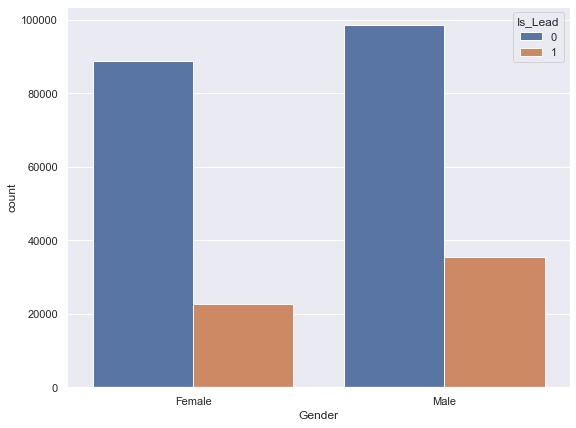

In [41]:
    sns.countplot(data = train_df, x='Gender', hue='Is_Lead')

### Occupation count based on target

<AxesSubplot:xlabel='Occupation', ylabel='count'>

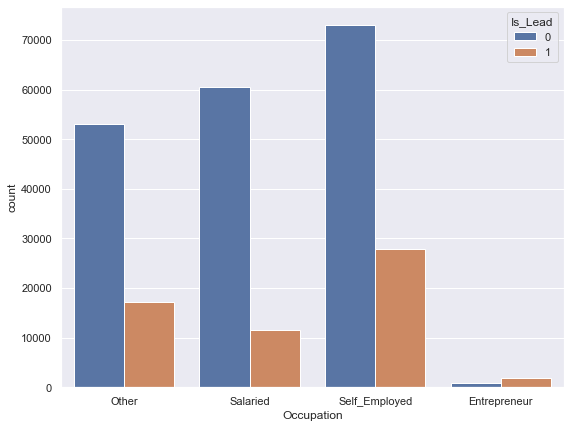

In [42]:
sns.countplot(data = train_df, x='Occupation', hue='Is_Lead')

### channel code count based on target value

<AxesSubplot:xlabel='Channel_Code', ylabel='count'>

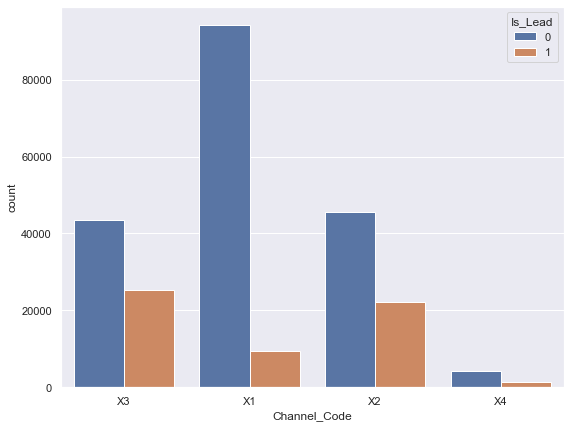

In [43]:
sns.countplot(data = train_df, x='Channel_Code', hue='Is_Lead')

### is active count based on target

<AxesSubplot:xlabel='Is_Active', ylabel='count'>

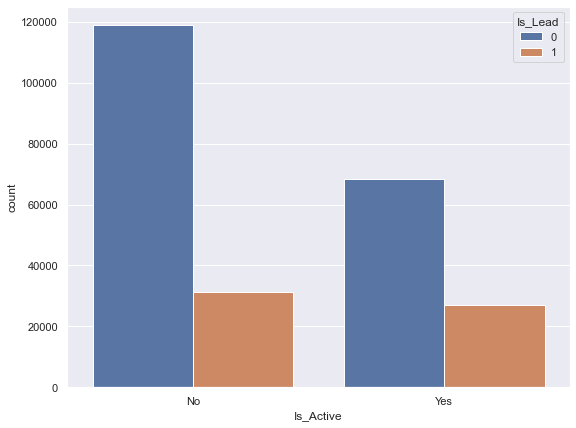

In [44]:
sns.countplot(data = train_df, x='Is_Active', hue='Is_Lead')

### Age distribution based on is_lead

<AxesSubplot:xlabel='Age', ylabel='Count'>

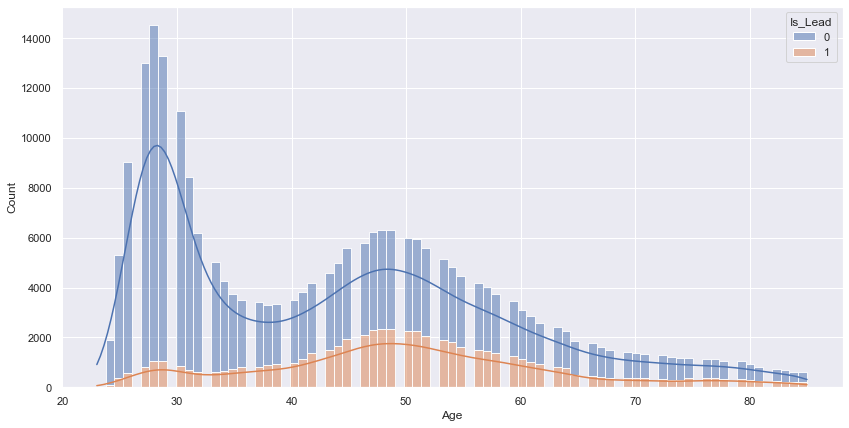

In [45]:
fig_dims = (14, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(x=train_df.Age, hue=train_df.Is_Lead, multiple='stack', kde='True')

### Age distribution based on Gender

<AxesSubplot:xlabel='Age', ylabel='Count'>

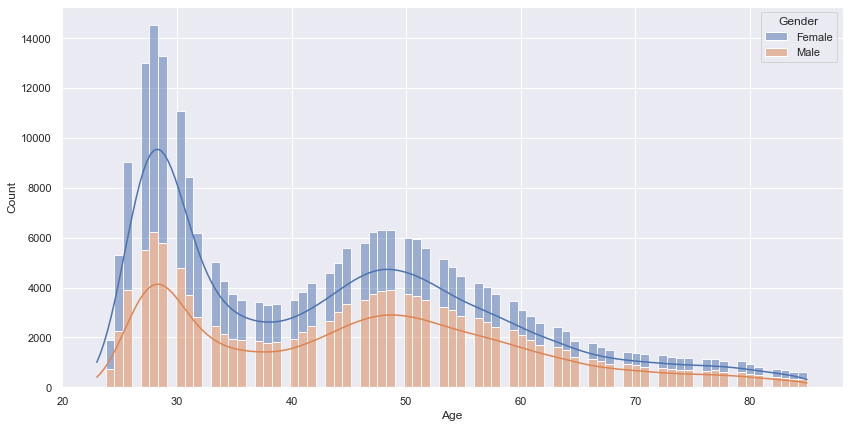

In [46]:
fig_dims = (14, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(x=train_df.Age, hue=train_df.Gender, multiple='stack', kde='True')

### Vintage distribution based on target

<AxesSubplot:xlabel='Vintage', ylabel='Count'>

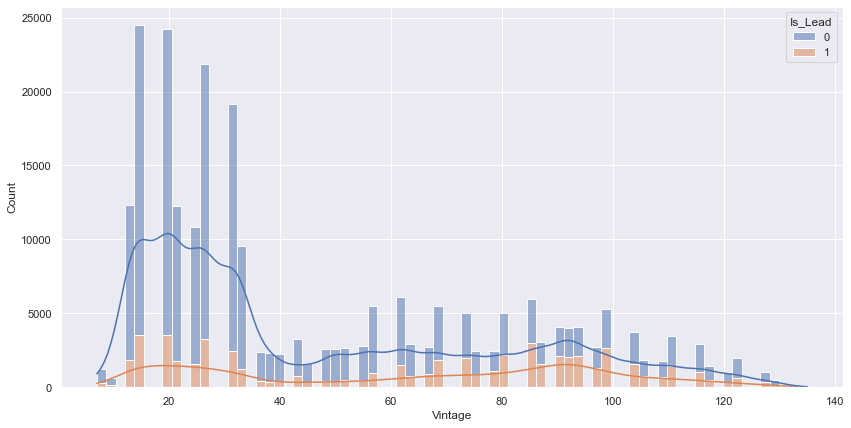

In [47]:
fig, ax = plt.subplots(figsize=(14,7))
sns.histplot(data=train_df, x='Vintage', hue='Is_Lead', multiple='stack', kde=True)

### occupation vs target based on gender

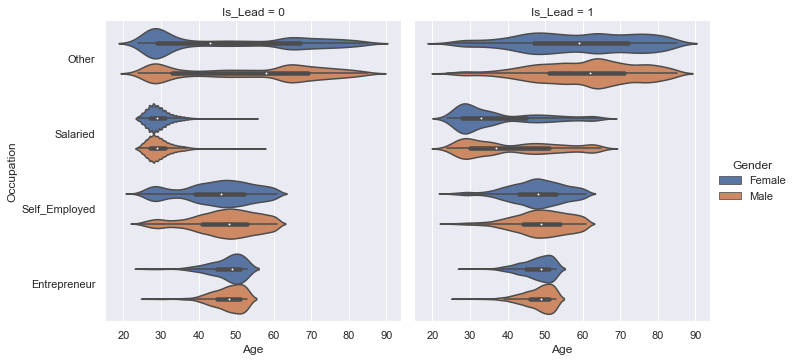

In [48]:
sns.catplot(data=train_df, x='Age', col='Is_Lead', y='Occupation', hue='Gender',
            kind='violin')

In [49]:
# sns.catplot(data=train_df, x='Age', col='Is_Lead', y='Channel_Code', hue='Gender',
#             kind='violin')

In [50]:
train_df.head(1)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0


### Removing unwanted features

In [51]:
train_df.drop(columns=['ID'], inplace=True)

In [52]:
train_df.head(1)

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0


### converting categorical features to Numerical

In [53]:
from sklearn.preprocessing import LabelEncoder
def onehot_encoder(x):
    return pd.get_dummies(x, drop_first=True)

def label_encoder(x):
    return LabelEncoder().fit_transform(x)

In [54]:
Gender = onehot_encoder(train_df.Gender)
Channer_Code = onehot_encoder(train_df.Channel_Code)
Credit_Product = onehot_encoder(train_df.Credit_Product)
Occupation = onehot_encoder(train_df.Occupation)
Is_Active = onehot_encoder(train_df.Is_Active)

train_df.Region_Code = label_encoder(train_df.Region_Code)

### Droping categorical column from train_df and adding encoded one

In [55]:
train_df.drop(columns=['Gender','Channel_Code','Credit_Product','Occupation',
                       'Is_Active'], inplace=True)

In [56]:
train_df = pd.concat([train_df, Gender, Channer_Code, Credit_Product,Occupation,
                      Is_Active.rename(columns={'Yes':'Is_Active'})], axis=1)

In [57]:
train_df.head(5)

,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Lead,Male,X2,X3,X4,Yes,Other,Salaried,Self_Employed,Is_Active
0,73,18,43,1045696,0,0,0,1,0,0,1,0,0,0
1,30,27,32,581988,0,0,0,0,0,0,0,1,0,0
2,56,18,26,1484315,0,0,0,1,0,0,0,0,1,1
3,34,20,19,470454,0,1,0,0,0,0,0,1,0,0
4,30,32,33,886787,0,0,0,0,0,0,0,1,0,0


### Handling the imbalance Data with the following techniques
- downsampling
- upsampling
- SMOTE
- ensemble

In [58]:
train_df.Is_Lead.value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [59]:
# First dividing the data based on 0 and 1 for Is_Lead
is_lead_0 = train_df[train_df.Is_Lead == 0]
is_lead_1 = train_df[train_df.Is_Lead == 1]
print(is_lead_0.shape, is_lead_1.shape)

(187437, 14) (58288, 14)


### DownSampling

In [60]:
# DownSamplling -  choosing only that much record from majority class as 
#                  there are in minority class

is_lead_0_d = is_lead_0.sample(is_lead_1.shape[0])

In [61]:
# lets check the size again after downsampling
print(is_lead_0_d.shape, is_lead_1.shape)

(58288, 14) (58288, 14)


In [62]:
# creating a dataframe for downsampled records
train_df_ds = pd.concat([is_lead_0_d, is_lead_1], axis=0, ignore_index=True)
train_df_ds.shape
#train_df_ds

(116576, 14)

### UpSampling

In [63]:
# UpSamplling -  filling duplicate random enteries in minor class to make its count reach
#                to major class count. replace = True is mandatory

is_lead_1_u = is_lead_1.sample(is_lead_0.shape[0], replace = True)

In [64]:
print(is_lead_1_u.shape, is_lead_0.shape)

(187437, 14) (187437, 14)


In [65]:
train_df_us = pd.concat([is_lead_1_u, is_lead_0], axis=0, ignore_index=True)
train_df_us.shape
#train_df_us

(374874, 14)

### SMOTE

In [66]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_train_sm, y_train_sm = smote.fit_resample(train_df.drop(columns='Is_Lead'),
                                            train_df.Is_Lead)
# checking the results
y_train_sm.value_counts()

0    187437
1    187437
Name: Is_Lead, dtype: int64

In [67]:
X_train_sm

,Age,Region_Code,Vintage,Avg_Account_Balance,Male,X2,X3,X4,Yes,Other,Salaried,Self_Employed,Is_Active
0,73,18,43,1045696,0,0,1,0,0,1,0,0,0
1,30,27,32,581988,0,0,0,0,0,0,1,0,0
2,56,18,26,1484315,0,0,1,0,0,0,0,1,1
3,34,20,19,470454,1,0,0,0,0,0,1,0,0
4,30,32,33,886787,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374869,48,4,103,883293,0,0,0,0,1,0,0,0,0
374870,48,25,70,1338526,0,0,0,0,1,0,0,0,1
374871,53,31,99,1388734,0,0,0,0,1,0,0,1,1
374872,77,23,92,768200,0,0,1,0,0,1,0,0,0


In [68]:
train_df_sm = pd.concat([X_train_sm, y_train_sm], axis=1)
train_df_sm.head(2)

,Age,Region_Code,Vintage,Avg_Account_Balance,Male,X2,X3,X4,Yes,Other,Salaried,Self_Employed,Is_Active,Is_Lead
0,73,18,43,1045696,0,0,1,0,0,1,0,0,0,0
1,30,27,32,581988,0,0,0,0,0,0,1,0,0,0


# Using Machine Learning Algorithms to predict Outputs

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression as LR
# from sklearn.neighbors import KNeighborsClassifier as KNN
# from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DT
# from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.ensemble import RandomForestClassifier as RF

### defining  functions which perform scaling, spliting, ML algo

In [2]:
def scale_split(data):
     
    # feature Scaling
    train_data = MinMaxScaler().fit_transform(data.drop(columns='Is_Lead'))
    # splitting dataset
    X_train, X_test, y_train, y_test = train_test_split(train_data, data.Is_Lead,
                                                        test_size=0.40, random_state=42)
    return X_train, X_test, y_train, y_test

def train_algo(X_train, y_train):
    models = []
    models.append(['LR', LR().fit(X_train, y_train)])
    #models.append(['GNB', GNB().fit(X_train, y_train)])
    models.append(['DT', DT().fit(X_train, y_train)])
    models.append(['RF', RF().fit(X_train, y_train)])
    return models

def models_prediction(X_test, y_test, models):
    precision, recall, f1score, confusion_mat = [], [], [], []
    for model in models:
        precision.append(precision_score(y_test, model[1].predict(X_test)))
        recall.append(recall_score(y_test, model[1].predict(X_test)))
        f1score.append(f1_score(y_test, model[1].predict(X_test)))
        confusion_mat.append(confusion_matrix(y_test, model[1].predict(X_test)))
    return precision, recall, f1score, confusion_mat

def models_results(models, precision, recall, f1score):
    results = pd.concat([
                          pd.DataFrame(models),
                          pd.DataFrame(precision, columns=['precison']),
                          pd.DataFrame(recall, columns=['recall']), 
                          pd.DataFrame(f1score, columns=['f1_score']
                        )], axis=1)
    return results

In [71]:
# def best_k_for_KNN(a,b):
#     accuracy=[]
#     for k in range(a,b):
#         model = KNN(n_neighbors = k).fit(X_train, y_train)
#         accuracy.append(accuracy_score(y_test, model.predict(X_test)))
#     return accuracy

In [72]:
# algorithms = [LR(),KNN(),DT(),RF()]

# #calling the above functions with downsample, upsample, smoted data
# ds_data_results = ml_process(train_df_ds, algorithms)
# # us_data_results = ml_process(train_df_us, algorithms)
# # sm_data_results = ml_process(train_df_sm, algorithms)

### Lets Analyse the results of DownSampled Data

In [73]:
X_train, X_test, y_train, y_test = scale_split(train_df_ds)

models_ds = train_algo(X_train, y_train)

precision, recall, f1score, confusion_mat_ds = models_prediction(X_test, y_test, models_ds)

results = models_results(models_ds, precision, recall, f1score)

results

,0,1,precison,recall,f1_score
0,LR,LogisticRegression(),0.727826,0.746966,0.737271
1,DT,DecisionTreeClassifier(),0.663182,0.668976,0.666067
2,RF,"(DecisionTreeClassifier(max_features='auto', r...",0.753010,0.737454,0.745151


### Lets Analyse the results of UpSampled Data

In [74]:
X_train, X_test, y_train, y_test = scale_split(train_df_us)

models_us = train_algo(X_train, y_train)

precision, recall, f1score, confusion_mat_us= models_prediction(X_test, y_test, models_us)

results = models_results(models_us, precision, recall, f1score)

results

,0,1,precison,recall,f1_score
0,LR,LogisticRegression(),0.726600,0.746561,0.736445
1,DT,DecisionTreeClassifier(),0.813941,0.930687,0.868408
2,RF,"(DecisionTreeClassifier(max_features='auto', r...",0.851466,0.947167,0.896771


### Lets Analyse the results of SMOTEd Data

In [75]:
X_train, X_test, y_train, y_test = scale_split(train_df_sm)

models_sm = train_algo(X_train, y_train)

precision, recall, f1score, confusion_mat_sm = models_prediction(X_test, y_test, models_sm)

results = models_results(models_sm, precision, recall, f1score)

results

,0,1,precison,recall,f1_score
0,LR,LogisticRegression(),0.836418,0.727410,0.778115
1,DT,DecisionTreeClassifier(),0.788730,0.798154,0.793414
2,RF,"(DecisionTreeClassifier(max_features='auto', r...",0.858101,0.814010,0.835474


## Working on test dataset

### readind test dataset

In [76]:
test_df = pd.read_csv('test_data.csv')
test_df.head(1)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No


In [77]:
test_df.shape

(105312, 10)

In [78]:
test_df.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [79]:
#test_df.dtypes

#test_df[test_df.duplicated()]

In [80]:
test_df.Credit_Product.value_counts(dropna=False)

No     61608
Yes    31182
NaN    12522
Name: Credit_Product, dtype: int64

### age vs credit prod

<AxesSubplot:xlabel='Age', ylabel='Count'>

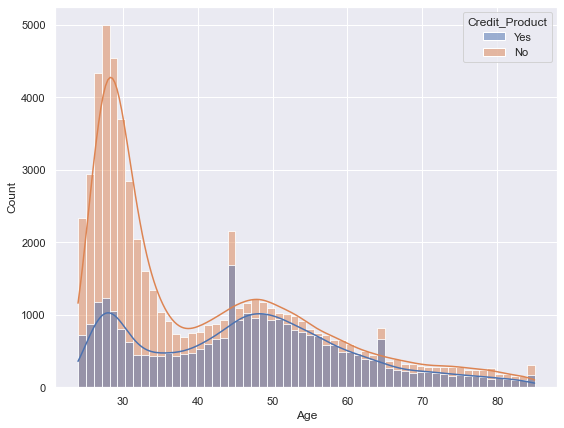

In [81]:
sns.histplot(x=test_df.Age, hue=test_df.Credit_Product, kde=True)

### age vs Occupation

<AxesSubplot:xlabel='Age', ylabel='Count'>

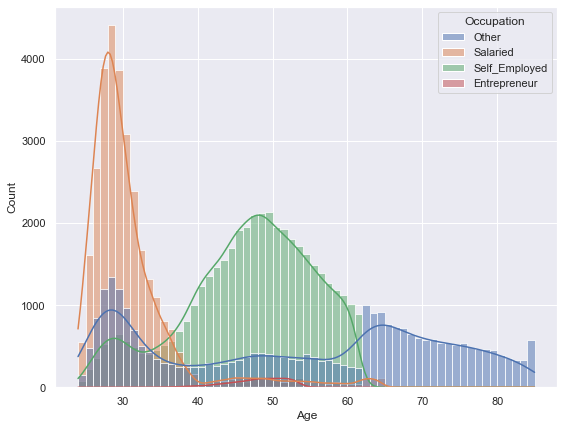

In [82]:
sns.histplot(x=test_df.Age, hue=test_df.Occupation, kde=True)

### age, occupation, channel code, credit prod

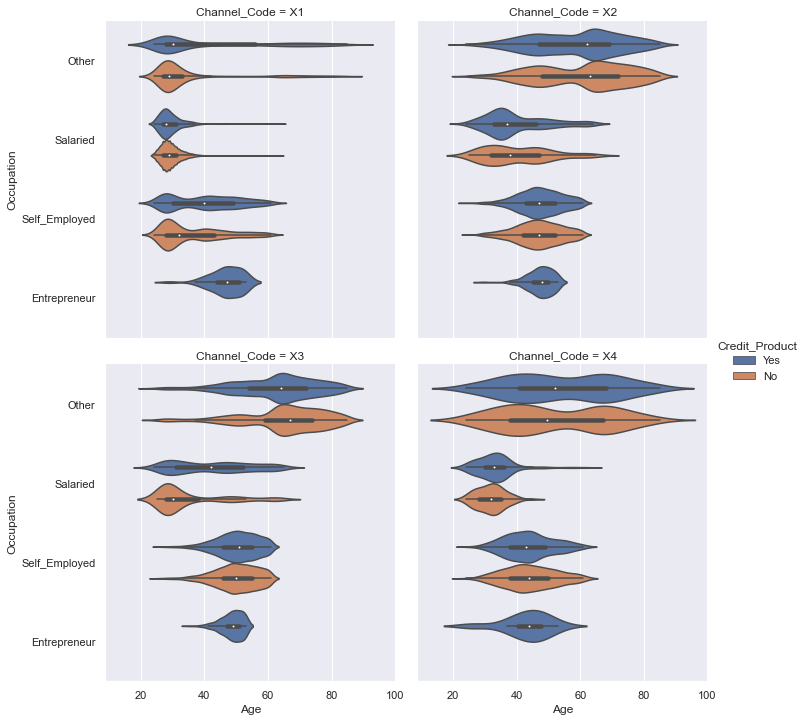

In [83]:
sns.catplot(data=test_df, x='Age', y='Occupation',col='Channel_Code', col_wrap=2,
            hue='Credit_Product', kind='violin')

In [84]:
#sns.histplot(x=test_df.Age, hue=test_df.Channel_Code, kde=True)

In [85]:
#sns.histplot(x=test_df.Vintage, hue=test_df.Credit_Product, kde=True)

In [86]:
test_df.groupby(['Occupation','Channel_Code']).Credit_Product.value_counts(dropna=False)

Occupation     Channel_Code  Credit_Product
Entrepreneur   X1            Yes                  48
                             NaN                  20
               X2            Yes                 260
                             NaN                 163
               X3            Yes                 333
                             NaN                 235
               X4            Yes                  11
                             NaN                   6
Other          X1            No                 7718
                             Yes                2167
                             NaN                 312
               X2            No                 4050
                             Yes                2902
                             NaN                1481
               X3            No                 4835
                             Yes                4009
                             NaN                2087
               X4            Yes                 264
  

### defining method to fill missing credit prod

In [87]:
def fill_cp(x):
    o, cc, age, cp = x
    if pd.isna(cp):
        if(o == 'Entrepreneur' or age>62):
            cp = 'Yes'
        else:
            if o == 'Other':
                if cc == 'X1':
                    cp = 'No'
                elif cc == 'X2':
                    cp = 'No'
                elif cc == 'X3':
                    cp = 'Yes'
                else:
                    cp = 'Yes'

            elif o == 'Salaried':
                if cc == 'X1':
                    cp = 'No'
                elif cc == 'X2':
                    cp = 'Yes'
                elif cc == 'X3':
                    cp = 'Yes'
                else:
                    cp = 'Yes'

            elif o == 'Self_Employed':
                if cc == 'X1':
                    cp = 'No'
                elif cc == 'X2':
                    cp ='No'
                elif cc == 'X3':
                    cp = 'Yes'
                else:
                    cp = 'Yes'
    return cp

test_df.Credit_Product = test_df[['Occupation', 'Channel_Code', 'Age', 'Credit_Product']].apply(fill_cp, axis=1)
            

In [88]:
test_df.isna().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

In [89]:
test_df.head(1)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No


### removing unwanted cols

In [90]:
test_df.drop(columns='ID',inplace=True)
test_df.head(0)

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active


### Encoding catergorical to numerical

In [91]:
Gender = onehot_encoder(test_df.Gender)
Channer_Code = onehot_encoder(test_df.Channel_Code)
Credit_Product = onehot_encoder(test_df.Credit_Product)
Occupation = onehot_encoder(test_df.Occupation)
Is_Active = onehot_encoder(test_df.Is_Active)

test_df.Region_Code = label_encoder(test_df.Region_Code)

### removing categorical and adding encoded features

In [92]:
test_df.drop(columns=['Gender','Channel_Code','Credit_Product','Occupation',
                       'Is_Active'], inplace=True)

test_df = pd.concat([test_df, Gender, Channer_Code, Credit_Product,Occupation,
                      Is_Active.rename(columns={'Yes':'Is_Active'})], axis=1)

In [93]:
test_df.head(3)

,Age,Region_Code,Vintage,Avg_Account_Balance,Male,X2,X3,X4,Yes,Other,Salaried,Self_Employed,Is_Active
0,29,4,25,742366,1,0,0,0,1,1,0,0,0
1,43,18,49,925537,1,1,0,0,0,1,0,0,0
2,31,20,14,215949,1,0,0,0,0,0,1,0,0


### scaling features

In [94]:
test_df = MinMaxScaler().fit_transform(test_df)

### Predicting test data based on upsampled Decision Tree Model

In [95]:
prediction_us_dt = models_us[1][1].predict(test_df)
prediction_us_dt

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### Predicting test data based on upsampled Random Forest Model

In [96]:
prediction_us_rf = models_us[2][1].predict(test_df)
prediction_us_rf

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### Predicting test data based on SMOTE-d Random Forest Model

In [97]:
prediction_sm_rf = models_sm[2][1].predict(test_df)
prediction_sm_rf

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### picking Random Forest SMOTE-d model and tuning it

In [114]:
rf_sm = models_sm[2][1]

In [121]:
rf_sm.max_depth

In [99]:
RF()

RandomForestClassifier()

In [128]:
from sklearn.model_selection import GridSearchCV

# grid_search_cv = GridSearchCV(rf_sm, {
#                     'n_estimators' : [400, 700, 1000, 1300],
#                     'class_weight':[{0:1, 1:2}]
#                 }, cv=5, return_train_score = False)

# X_train, X_test, y_train, y_test = scale_split(train_df_sm)
# model_rf_sm = grid_search_cv.fit(X_train, y_train)

In [129]:
# pd.DataFrame(grid_search_cv.cv_results_)[['param_n_estimators', 
#                                           'param_class_weight', 
#                                           'mean_test_score']]

,param_n_estimators,param_class_weight,mean_test_score
0,400,"{0: 1, 1: 2}",0.838230
1,700,"{0: 1, 1: 2}",0.837843
2,1000,"{0: 1, 1: 2}",0.837879
3,1300,"{0: 1, 1: 2}",0.838176


In [ ]:
grid_search_cv = GridSearchCV(rf_sm, {
                    'n_estimators' : [100, 500, 1000],
                    'max_depth' : [50, 100],
                    'class_weight':[{0:1, 1:1.5}]
                }, cv=5, return_train_score = False)

X_train, X_test, y_train, y_test = scale_split(train_df_sm)
model_rf_sm = grid_search_cv.fit(X_train, y_train)